# Coronal Hole Matching between Frames using KNN and centroid distance. 

 Python libraries:
1. numpy
2. matplotlib
3. sklearn

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from ch_db import CoronalHoleDB
#import analysis
#import analysis.ml_analysis
#from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
import json
import pickle

plt.rcParams["figure.figsize"] = (10,10)

ModuleNotFoundError: No module named 'cv2'

# Test Trail
## Read Coronal Hole database training dataset for the first 9 frames. 

In [14]:
file_name = "results/first_frame_test.json"

# open using json. 
with open(file_name) as json_file:
    data = json.load(json_file)

In [18]:
print("number of frames in the training dataset", data["num_frames"])

number of frames in the training dataset 26


In [19]:
print("number of coronal holes in the training dataset", data["num_coronal_holes"])

number of coronal holes in the training dataset 56


In [26]:
# read coronal holes in database 
ch_db = data["coronal_holes"]

In [38]:
# coronal hole centroid (theta, phi). 
X = []
# coronal hole id. 
Y = []

for ch in ch_db:
    for f in ch["contour_list"]:
        X.append(f["centroid_spherical"])
        Y.append(f["id"])

In [40]:
# cartesian coordinates.
x_coord = []
y_coord = []
z_coord = []

for theta, phi in X:
    x_coord.append(np.sin(theta)*np.cos(phi))
    y_coord.append(np.sin(theta)*np.sin(phi))
    z_coord.append(np.cos(theta))

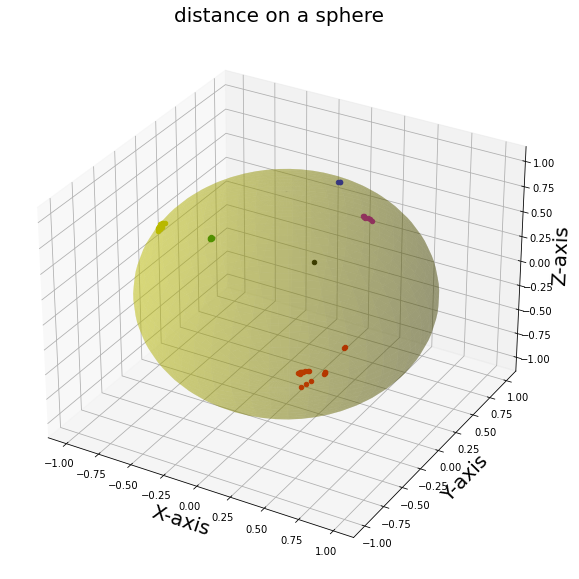

In [54]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

# draw sphere
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
# alpha controls opacity
ax.plot_surface(x, y, z, color="y", alpha=0.3)


for ii in range(len(Y)):
    if Y[ii]==1:
        color="r"
    elif Y[ii]==2:
        color="b"
    elif Y[ii]==3:
        color="k"
    elif Y[ii]==4:
        color="g"
    elif Y[ii]==5:
        color="y"
    elif Y[ii]==6:
        color="m"
    else:
        color=None
    
    if color is not None:
        ax.scatter(x_coord[ii], y_coord[ii], z_coord[ii], c=color, label=Y[ii])
        #ax.text(x_coord[ii], y_coord[ii], z_coord[ii], str(ii), fontsize=20)

#ax.scatter(-0.550,-0.63, 0.540, c="g", label="?")
#ax.text(-0.550, -0.63, 0.540, r"?", fontsize=20)


ax.set_xlabel('X-axis', fontsize=20)
ax.set_ylabel('Y-axis', fontsize=20)
ax.set_zlabel('Z-axis', fontsize=20)

ax.set_title('distance on a sphere', fontsize=20)
plt.savefig("KNNclassifier3D.png")

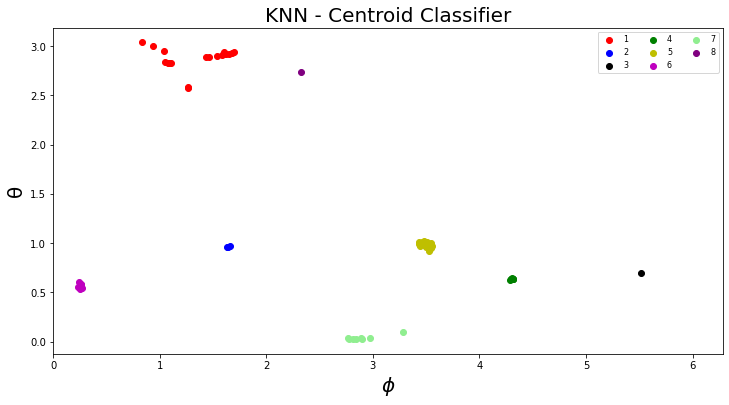

In [59]:
plt.subplots(figsize=(12, 6))

for ii in range(len(Y)):
    if Y[ii]==1:
        color="r"
        ch1 = plt.scatter(X[ii][1], X[ii][0], c=color, label=Y[ii])
    elif Y[ii]==2:
        color="b"
        ch2 = plt.scatter(X[ii][1], X[ii][0], c=color, label=Y[ii])
    elif Y[ii]==3:
        color="k"
        ch3 = plt.scatter(X[ii][1], X[ii][0], c=color, label=Y[ii])
    elif Y[ii]==4:
        color="g"
        ch4 = plt.scatter(X[ii][1], X[ii][0], c=color, label=Y[ii])
    elif Y[ii]==5:
        color="y"
        ch5 = plt.scatter(X[ii][1], X[ii][0], c=color, label=Y[ii])
    elif Y[ii]==6:
        color="m"
        ch6 = plt.scatter(X[ii][1], X[ii][0], c=color, label=Y[ii])
    elif Y[ii]==7:
        color="lightgreen"
        ch7 = plt.scatter(X[ii][1], X[ii][0], c=color, label=Y[ii])
    elif Y[ii]==8:
        color="purple"
        ch8 = plt.scatter(X[ii][1], X[ii][0], c=color, label=Y[ii])
    #plt.text(X[ii][0], X[ii][1]+0.1, str(ii), fontsize=15)

#plt.scatter(4, 1, c="g", label="?")
#plt.text(4, 1.1, r"?", fontsize=15)
plt.xlabel("$\phi$", fontsize=20)
plt.ylabel("\u03B8", fontsize=20)
plt.title("KNN - Centroid Classifier", fontsize=20)
plt.xlim(0, 2*np.pi)

plt.legend((ch1, ch2, ch3, ch4, ch5, ch6, ch7, ch8),
           ('1', '2', '3', '4', '5', '6', '7', '8'),
           scatterpoints=1,
           #loc='lower left',
           ncol=3,
           fontsize=8)

plt.savefig("KNNclassifier.png")


In [75]:
# coronal hole centroid (theta, phi). 
X = []
# coronal hole id. 
Y = []

for ch in ch_db:
    for f in ch["contour_list"]:
        print(f[""])
        X.append(f["centroid_spherical"])
        Y.append(f["id"])

{'id': 1, 'color': [145, 175, 247], 'centroid_spherical': [3.0368749786757157, 0.8336257600448672], 'centroid_pixel': [383, 85], 'area': 0.26893657717688724, 'box': [0, 300, 643, 97], 'straight_box_area': 1.7777758147382983, 'rotated_box_area': 1.7792084801054608, 'rotated_box_angle': 90.0, 'pca_tilt': 104.81851942078653, 'significance_of_tilt': 11.470856728641843}
{'id': 1, 'color': [145, 175, 247], 'centroid_spherical': [3.0000686422751452, 0.9325094388677851], 'centroid_pixel': [379, 95], 'area': 0.23628685625633156, 'box': [0, 301, 643, 96], 'straight_box_area': 1.743276184455051, 'rotated_box_area': 1.7446820018609035, 'rotated_box_angle': 90.0, 'pca_tilt': 103.3639522835413, 'significance_of_tilt': 9.097003922321306}
{'id': 1, 'color': [145, 175, 247], 'centroid_spherical': [2.9515322276997735, 1.0441662522863095], 'centroid_pixel': [372, 106], 'area': 0.21586137182671294, 'box': [0, 301, 643, 96], 'straight_box_area': 1.743276184455051, 'rotated_box_area': 1.7446820018609035, 'r

In [60]:
def haversine(c1, c2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    lat1, lon1 = c1
    lat2, lon2 = c2
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2.)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 1 # Radius is unitary. 1 Solar Radii. 
    return c * r

In [61]:
def vincenty(c1, c2):
    """ haversine suffers from antipodal points, the vincenty formula solves such ambiguity."""
    
    lat1, lon1 = c1
    lat2, lon2 = c2
    
    dlon = abs(lon2 - lon1) 
    dlat = lat2 - lat1 
    
    term1 = np.cos(lat1)*np.sin(lat2) - np.sin(lat1)*np.cos(lat2)*np.cos(dlon)
    
    term2 = np.cos(lat2)*np.sin(dlon)
    
    num = np.sqrt(term2**2 + term1**2)
    
    denom = np.sin(lat1)*np.sin(lat2) + np.cos(lat1)*np.cos(lat2)*np.cos(dlon)
    
    return np.arctan2(num, denom)

In [62]:
#sklearn classified
clf = KNeighborsClassifier(n_neighbors=6, metric=vincenty)

In [63]:
clf.fit(X, Y)

KNeighborsClassifier(metric=<function vincenty at 0x14c7e70d0>, n_neighbors=6)

In [64]:
res = clf.predict([[4, 1]])
res

array([1])

In [65]:
clf.kneighbors([[4, 1]])

(array([[0.97401758, 1.00168122, 1.00438401, 1.04918986, 1.13298743,
         1.14944452]]),
 array([[  0,   1, 146,   2, 219, 182]]))

In [66]:
# VINCENTY 
jj = 0
for p, t in X:
    print(jj, Y[jj], vincenty([4, 1],  [p, t]))
    jj+=1

0 1 0.9740175787969937
1 1 1.001681223244968
2 1 1.0491898616980753
3 1 1.1611336803485282
4 1 1.1690746680853958
5 1 1.1735608265151196
6 1 1.1780739256133594
7 1 1.1749081037886704
8 1 1.186409298349375
9 1 1.2016155418709697
10 1 1.2054931896313754
11 1 1.2081868922260437
12 1 1.2207050767735432
13 1 1.2197681976405956
14 1 1.188990589548812
15 1 1.2078717080707673
16 1 1.225508278551064
17 1 1.4431171103305638
18 1 1.4363892463397436
19 2 2.7431678546755265
20 2 2.7394317258883096
21 2 2.7283749804691872
22 3 1.96372054506979
23 4 1.4887169980006156
24 4 1.4995980250275391
25 4 1.5034577411265593
26 4 1.50577668357118
27 4 1.5021956396902083
28 4 1.5054304923070367
29 4 1.496818628511892
30 4 1.4974948578250034
31 5 1.9546357489577129
32 5 1.9450230736369962
33 5 1.951771995065097
34 5 1.947600730294364
35 5 1.947879689789859
36 5 1.9272860613913518
37 5 1.9311858298726978
38 5 1.937863889191363
39 5 1.9112144685676062
40 5 1.9061206762304523
41 5 1.902458195872752
42 5 1.899938780

In [67]:
# HAVERSINE 
jj = 0
for p, t in X:
    print(jj, Y[jj], haversine([4, 1],  [p, t]))
    jj+=1

0 1 0.9740175787969937
1 1 1.0016812232449683
2 1 1.0491898616980753
3 1 1.1611336803485284
4 1 1.1690746680853958
5 1 1.1735608265151196
6 1 1.1780739256133594
7 1 1.1749081037886704
8 1 1.1864092983493753
9 1 1.2016155418709695
10 1 1.2054931896313756
11 1 1.2081868922260437
12 1 1.220705076773543
13 1 1.2197681976405956
14 1 1.188990589548812
15 1 1.2078717080707675
16 1 1.225508278551064
17 1 1.4431171103305638
18 1 1.4363892463397439
19 2 2.7431678546755274
20 2 2.739431725888309
21 2 2.7283749804691872
22 3 1.9637205450697903
23 4 1.488716998000616
24 4 1.4995980250275396
25 4 1.5034577411265588
26 4 1.5057766835711799
27 4 1.5021956396902083
28 4 1.5054304923070365
29 4 1.496818628511892
30 4 1.4974948578250034
31 5 1.9546357489577124
32 5 1.9450230736369962
33 5 1.9517719950650965
34 5 1.947600730294364
35 5 1.9478796897898587
36 5 1.9272860613913518
37 5 1.9311858298726976
38 5 1.937863889191363
39 5 1.9112144685676062
40 5 1.9061206762304523
41 5 1.9024581958727518
42 5 1.899

In [68]:
clf.predict_proba([[4, 1]])

array([[0.5       , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.16666667, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.16666667, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16666667,
        0.        ]])

# Read Training Dataset from Pickle file as an object 

In [85]:

file_name = "results/first_frame_test.pkl"
ch_db = pickle.load(open( file_name, "rb"))

ModuleNotFoundError: No module named 'analysis'

In [83]:
open( file_name, "rb" )

<_io.BufferedReader name='results/first_frame_test.pkl'>